In [1]:
!pip install wordcloud

In [2]:
!pip install -U spacy

     |████████████████████████████████| 6.2 MB 12.2 MB/s 
     |████████████████████████████████| 42 kB 1.4 MB/s 
     |████████████████████████████████| 457 kB 73.8 MB/s 
     |████████████████████████████████| 10.1 MB 39.9 MB/s 
     |████████████████████████████████| 181 kB 100.5 MB/s 
     |████████████████████████████████| 660 kB 82.4 MB/s 
     |████████████████████████████████| 58 kB 5.0 MB/s 
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.2.0
    Uninstalling typing-extensions-4.2.0:
      Successfully uninstalled typing-extensions-4.2.0
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: smart-open
    Found existing installation: smart-open 6.0.0
   

In [3]:
import sklearn
print(sklearn.__version__)

1.0.2


In [4]:
import re 
import string
import numpy as np 
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.metrics import accuracy_score,  plot_confusion_matrix,classification_report, confusion_matrix
from wordcloud import WordCloud

import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

In [5]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
%matplotlib inline
pd.set_option('display.max_columns', None)

import re 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import joblib
from nltk.tokenize import RegexpTokenizer
import nltk
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, plot_confusion_matrix 
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score

from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from imblearn.combine import SMOTETomek
import string
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from wordcloud import WordCloud

import random
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

In [6]:
df= pd.read_csv('/content/drive/MyDrive/fake_job_postings.csv') 

In [7]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [8]:
df.shape

(17880, 18)

In [9]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [10]:
columns=['job_id','telecommuting','has_company_logo','has_questions','salary_range','employment_type']
for colu in columns:
    del df[colu]

In [11]:
df.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [12]:
df.fillna('', inplace=True)

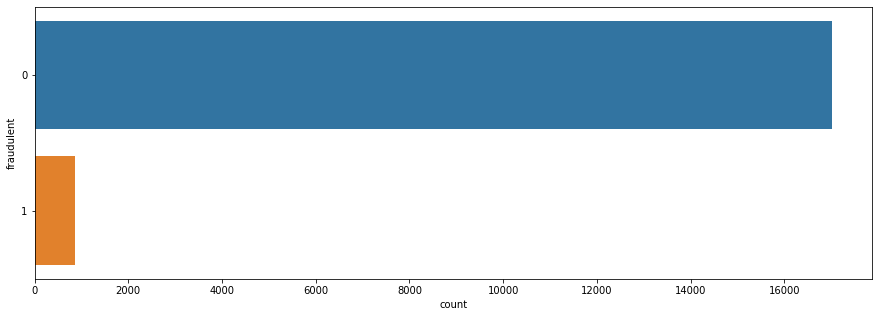

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(y='fraudulent', data=df)
plt.show()

In [14]:
df.groupby('fraudulent')['fraudulent'].count()

fraudulent
0    17014
1      866
Name: fraudulent, dtype: int64

In [15]:
exp= dict (df.required_experience.value_counts())
del exp['']

In [16]:
exp

{'Associate': 2297,
 'Director': 389,
 'Entry level': 2697,
 'Executive': 141,
 'Internship': 381,
 'Mid-Senior level': 3809,
 'Not Applicable': 1116}

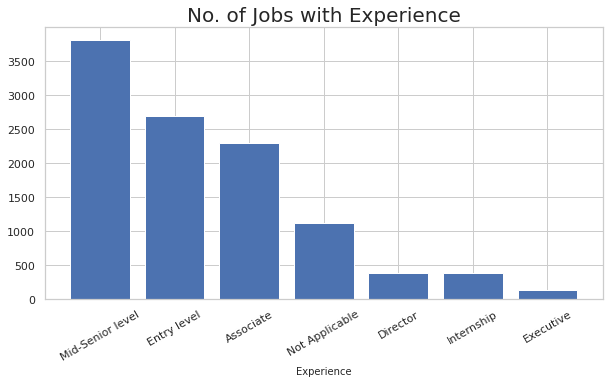

In [17]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
plt.bar(exp.keys(), exp.values())
plt.title('No. of Jobs with Experience', size=20)
plt.xlabel('Experience', size=10)
plt.xticks(rotation=30)
plt.show()

In [18]:
def split(location):
    l= location.split(',')
    return l[0]
df['country']= df.location.apply(split)

In [19]:
countr=dict(df.country.value_counts()[:14])
del countr['']
countr

{'AU': 214,
 'BE': 117,
 'CA': 457,
 'DE': 383,
 'GB': 2384,
 'GR': 940,
 'IE': 114,
 'IN': 276,
 'NL': 127,
 'NZ': 333,
 'PH': 132,
 'SG': 80,
 'US': 10656}

Text(0.5, 0, 'Countries')

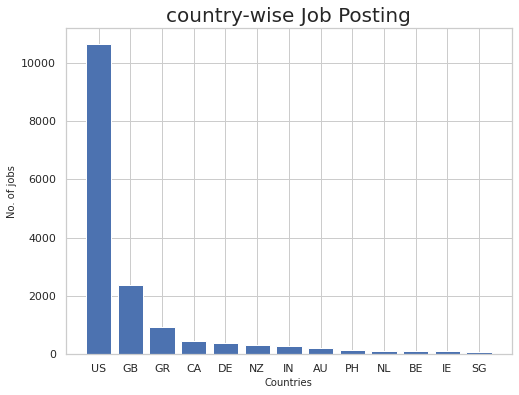

In [20]:
plt.figure(figsize=(8,6))
plt.title('country-wise Job Posting', size=20)
plt.bar(countr.keys(), countr.values())
plt.ylabel('No. of jobs', size=10)
plt.xlabel('Countries', size=10)

In [21]:
edu= dict(df.required_education.value_counts()[:7])
del edu['']
edu

{'Associate Degree': 274,
 "Bachelor's Degree": 5145,
 'Certification': 170,
 'High School or equivalent': 2080,
 "Master's Degree": 416,
 'Unspecified': 1397}

Text(0.5, 0, 'Education')

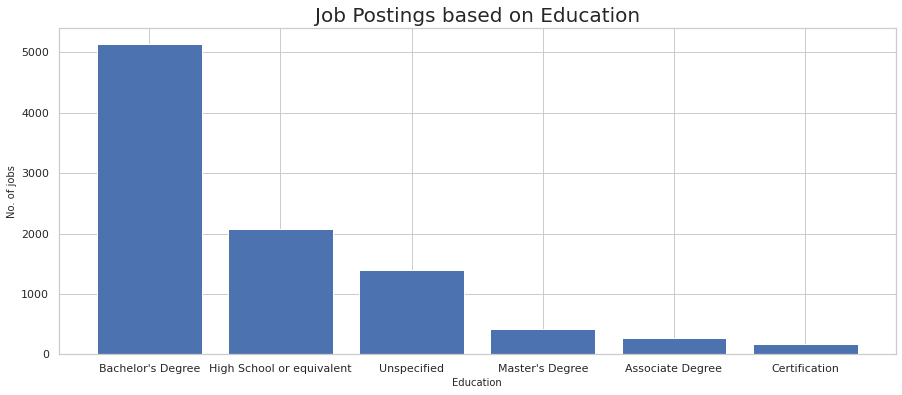

In [22]:
plt.figure(figsize=(15,6))
plt.title('Job Postings based on Education', size=20)
plt.bar(edu.keys(),edu.values())
plt.ylabel('No. of jobs', size=10)
plt.xlabel('Education', size=10)

In [23]:
print(df[df.fraudulent==0].title.value_counts()[:10])

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        62
Name: title, dtype: int64


In [24]:
print(df[df.fraudulent==1].title.value_counts()[:10])

Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Network Marketing                                                       10
Payroll Clerk                                                           10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Name: title, dtype: int64


In [25]:
df['text']=df['title']+' '+df['location']+' '+df['company_profile']+' '+df['description']+' '+df['requirements']+' '+df['benefits']

df.text.fillna(' ', inplace=True)

fraudjobs_text = df[df.fraudulent==0].text

In [26]:
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words("english"))
default_stemmer = PorterStemmer()
default_stopwords = stopwords.words('english')
default_tokenizer=RegexpTokenizer(r"\w+")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


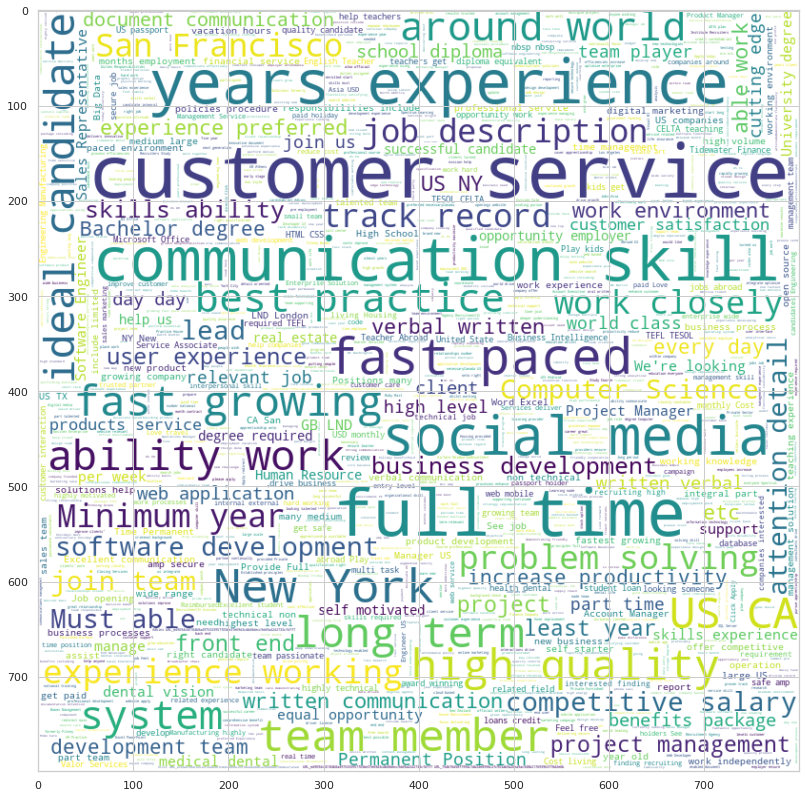

In [27]:
plt.figure(figsize = (16,14))
wc = WordCloud(background_color='white', min_font_size = 3,  max_words = 3000 , width = 800 , height = 800 , stopwords = stop_words).generate(str(" ".join(fraudjobs_text)))
plt.imshow(wc,interpolation = 'bilinear')

In [28]:
df['text']=df['title']+' '+df['location']+' '+df['company_profile']+' '+df['description']+' '+df['requirements']+' '+df['benefits']

df.text.fillna(' ', inplace=True)

fraudjobs_text = df[df.fraudulent==1].text

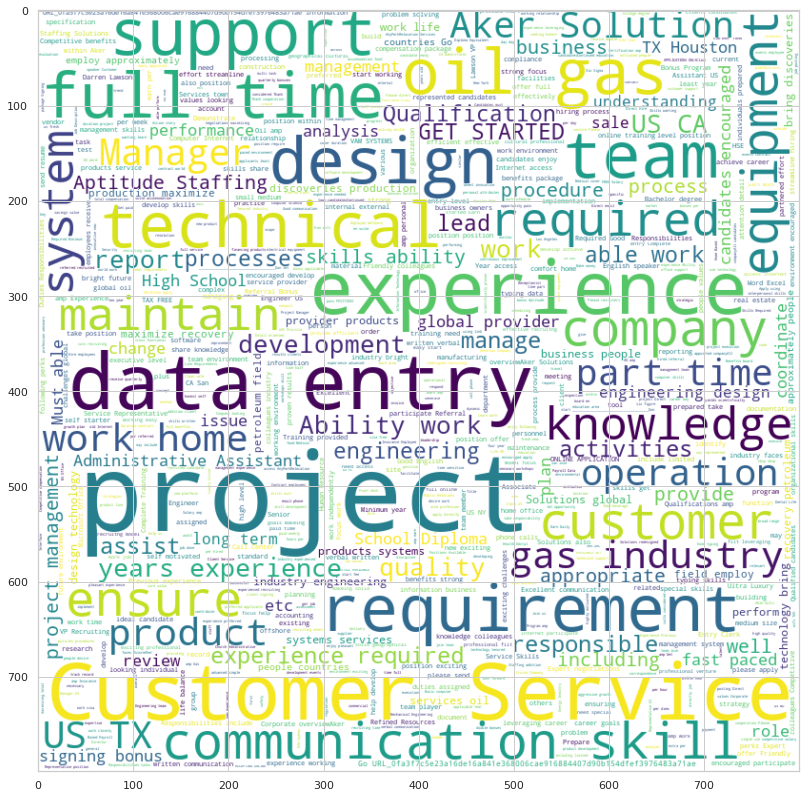

In [29]:
plt.figure(figsize = (16,14))
wc = WordCloud(background_color='white', min_font_size = 3,  max_words = 3000 , width = 800 , height = 800 , stopwords = stop_words).generate(str(" ".join(fraudjobs_text)))
plt.imshow(wc,interpolation = 'bilinear')

In [30]:

#merge the title, location, profile, description, requirements into a mega text column

df['text']=df['title']+' '+df['location']+' '+df['company_profile']+' '+df['description']+' '+df['requirements']+' '+df['benefits']

df = df[['text','fraudulent']]

In [31]:
df.head()

,text,fraudulent
0,"Marketing Intern US, NY, New York We're Food52...",0
1,"Customer Service - Cloud Video Production NZ, ...",0
2,"Commissioning Machinery Assistant (CMA) US, IA...",0
3,"Account Executive - Washington DC US, DC, Wash...",0
4,"Bill Review Manager US, FL, Fort Worth SpotSou...",0


In [32]:
!pip install spacy && python -m spacy download en

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     |████████████████████████████████| 12.8 MB 13.8 MB/s 
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [33]:
# spacy tokenizer

# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load("en_core_web_sm")
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

# Custom cleanning class
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

def clean_text(text):
    # Removing spaces and converting text into lowercase
    # TBD

    return text.strip().lower()

In [34]:
df['text'] =df['text'].apply(clean_text)

In [35]:
cv =TfidfVectorizer(max_features =100)
x=cv.fit_transform(df['text'])
df1=pd.DataFrame(x.toarray(), columns=cv.get_feature_names())
df.drop(["text"], axis=1,inplace=True)
main_df= pd.concat([df1,df], axis =1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [36]:
main_df.head()

,ability,about,all,also,amp,an,and,are,as,at,based,be,best,business,but,by,can,client,clients,communication,company,customer,customers,data,design,development,do,environment,experience,for,from,full,has,have,help,high,if,in,including,industry,is,it,job,knowledge,looking,management,marketing,more,must,new,not,of,office,on,one,opportunity,or,other,our,people,position,product,products,project,provide,quality,re,required,sales,service,services,skills,software,solutions,strong,support,team,technical,technology,that,the,their,this,through,time,to,up,us,we,web,well,who,will,with,work,working,world,years,you,your,fraudulent
0,0.000000,0.040922,0.000000,0.042219,0.036312,0.000000,0.751597,0.000000,0.078274,0.000000,0.000000,0.000000,0.042864,0.034014,0.039936,0.130365,0.000000,0.000000,0.000000,0.036943,0.031230,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.023298,0.081063,0.000000,0.039712,0.085713,0.054063,0.00000,0.000000,0.0,0.237620,0.000000,0.000000,0.022665,0.000000,0.000000,0.000000,0.000000,0.072078,0.097103,0.038339,0.000000,0.165596,0.000000,0.119764,0.044912,0.119870,0.041664,0.000000,0.024719,0.000000,0.000000,0.038614,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.129095,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.127359,0.053447,0.0,0.040840,0.000000,0.290230,0.069279,0.000000,0.000000,0.032030,0.183118,0.000000,0.024611,0.203960,0.000000,0.040005,0.00000,0.000000,0.185171,0.050739,0.067701,0.000000,0.000000,0.000000,0.000000,0
1,0.021899,0.094202,0.035399,0.024297,0.041796,0.029777,0.490997,0.056638,0.060062,0.052432,0.043406,0.043653,0.000000,0.078300,0.000000,0.075025,0.085446,0.053211,0.048732,0.021261,0.000000,0.115070,0.000000,0.0,0.0,0.000000,0.051708,0.022008,0.093855,0.151618,0.089271,0.000000,0.098655,0.062227,0.00000,0.043782,0.0,0.193730,0.136679,0.000000,0.156523,0.076858,0.000000,0.022283,0.020279,0.082962,0.000000,0.022064,0.000000,0.000000,0.021225,0.218260,0.025847,0.096580,0.047955,0.024084,0.085355,0.000000,0.068631,0.000000,0.023946,0.02574,0.0,0.174270,0.000000,0.050273,0.000000,0.000000,0.000000,0.220457,0.000000,0.017476,0.025826,0.000000,0.000000,0.000000,0.046138,0.0,0.000000,0.107758,0.453361,0.000000,0.070896,0.000000,0.018433,0.152222,0.000000,0.014164,0.130421,0.026817,0.000000,0.00000,0.078020,0.165769,0.043800,0.116886,0.099347,0.000000,0.204896,0.130479,0
2,0.000000,0.000000,0.176735,0.000000,0.041735,0.089200,0.396893,0.113110,0.000000,0.000000,0.000000,0.029059,0.000000,0.000000,0.000000,0.037458,0.000000,0.159401,0.000000,0.000000,0.071787,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.116459,0.035656,0.000000,0.049256,0.000000,0.00000,0.000000,0.0,0.113792,0.000000,0.050243,0.130246,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050423,0.038064,0.000000,0.229412,0.000000,0.027554,0.000000,0.048098,0.028410,0.000000,0.082237,0.000000,0.000000,0.00000,0.0,0.058005,0.046233,0.050200,0.000000,0.000000,0.000000,0.000000,0.219788,0.069802,0.000000,0.048142,0.094559,0.048792,0.000000,0.0,0.000000,0.215201,0.524177,0.000000,0.000000,0.047991,0.000000,0.350768,0.000000,0.028286,0.026046,0.000000,0.000000,0.00000,0.062325,0.307407,0.058315,0.000000,0.000000,0.000000,0.094429,0.074450,0
3,0.023265,0.000000,0.018803,0.000000,0.000000,0.094900,0.695482,0.000000,0.031904,0.037134,0.000000,0.015458,0.000000,0.145568,0.024416,0.019926,0.000000,0.000000,0.000000,0.022586,0.019094,0.024449,0.054735,0.0,0.0,0.045657,0.054932,0.070140,0.085463,0.123902,0.000000,0.000000,0.000000,0.016527,0.02276,0.000000,0.0,0.084745,0.096801,0.053454,0.069285,0.000000,0.000000,0.071018,0.000000,0.022034,0.000000,0.046879,0.000000,0.020249,0.000000,0.317295,0.000000,0.029315,0.000000,0.025586,0.060451,0.022126,0.058328,0.023608,0.025439,0.00000,0.0,0.000000,0.049188,0.053408,0.000000,0.024289,0.173089,0.000000,0.023383,0.018566,0.000000,0.051219,0.025151,0.025955,0.065354,0.0,0.099875,0.049062,0.278838,0.042356,0.000000,0.127646,0.019582,0.335867

In [37]:
Y=main_df.iloc[:,-1]
X=main_df.iloc[:,:-1]

X_train,X_test, y_train, y_test =train_test_split(X,Y, test_size=0.3)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12516, 100)
(12516,)
(5364, 100)
(5364,)


In [38]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

In [39]:
from collections import Counter
from imblearn.over_sampling import ADASYN

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=130)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)

Before Counter({0: 11910, 1: 606})
After Counter({0: 11910, 1: 11901})


**KNN**

In [40]:
import time
import warnings
import pandas as pd
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings("ignore")

In [41]:
start_time = time.time()
knn = KNeighborsClassifier()
n_neighbors = [i for i in range(2, 6)]
param_dist = {"n_neighbors": n_neighbors, "weights": ['distance'], "n_jobs": [-1]}

In [42]:
grid_search = GridSearchCV(knn, param_grid=param_dist, scoring='f1', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_jobs': [-1], 'n_neighbors': [2, 3, 4, 5],
                         'weights': ['distance']},
             scoring='f1')

In [43]:
best_knn = grid_search.best_estimator_
print(best_knn)

KNeighborsClassifier(n_jobs=-1, n_neighbors=2, weights='distance')


In [44]:
y_predict_knn = best_knn.predict(X_test)
end_time = time.time()

In [46]:
knn_report = classification_report(y_test, y_predict_knn)
print(knn_report)
print("Execution time for KNN(ADASYN): %s min" % ((end_time - start_time)/60))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5104
           1       0.79      0.67      0.72       260

    accuracy                           0.98      5364
   macro avg       0.89      0.83      0.85      5364
weighted avg       0.97      0.98      0.97      5364

Execution time for KNN(ADASYN): 0.47542793353398644 min
